In [38]:
# import modules
import pandas as pd
pd.options.display.max_colwidth=500
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
import typing
nltk.download('stopwords')
nltk.download('wordnet')
import re
#Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
#packages to build our knn model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
     # Enter your own credentials obtained
        # from your developer account
        consumer_key = "AKJRvPwuZS686p1dxkTx3WDnV"
        consumer_secret = "MZ2dakCiJtGBzBkpfTVMFHIlPlwJjYV1bOZg5RN0qIRKxi8d6i"
        access_key = "1498368813867413505-CosP8pC5BUHY9W730ZbjcNhaA9Gk0m"
        access_secret = "eBAL5p7c4DYZVGsIPpRYHQObsAt1HEBsomcGYjUEAwT47"
 

In [40]:
alltweets = []
# Defining the function to get the tweets
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    totaltweets = [[tweet.created_at,tweet._json["user"]["name"],tweet.user.description,tweet.user.statuses_count,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.lang,tweet.user.friends_count,tweet.user.followers_count,tweet.retweet_count,tweet.retweeted,tweet.text,
                  tweet._json["user"]["location"]] for tweet in alltweets]
     
    tweets_df = pd.DataFrame(columns = ["time","name","totaltweets","description","hashtags","user_mentions","favorite_count",
                                    "lang","following","followers_count","retweet_count","retweeted",
                                    "text","location"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in totaltweets])
    tweets_df["name"] = pd.Series([str(i[1]) for i in totaltweets])
    tweets_df["description"] = pd.Series([str(i[2]) for i in totaltweets])
    tweets_df["totaltweets"] = pd.Series([str(i[3]) for i in totaltweets])            
    tweets_df["hashtags"] = pd.Series([str(i[4]) for i in totaltweets])
    tweets_df["user_mentions"] = pd.Series([str(i[5]) for i in totaltweets])
    tweets_df["favorite_count"] = pd.Series([str(i[6]) for i in totaltweets])
    tweets_df["lang"] = pd.Series([str(i[7]) for i in totaltweets])
    tweets_df["following"] = pd.Series([str(i[8]) for i in totaltweets])
    tweets_df["followers_count"] = pd.Series([str(i[9]) for i in totaltweets])
    tweets_df["retweet_count"] = pd.Series([str(i[10]) for i in totaltweets])
    tweets_df["retweeted"] = pd.Series([str(i[11]) for i in totaltweets])
    tweets_df["text"] = pd.Series([str(i[12]) for i in totaltweets])
    tweets_df["location"] = pd.Series([str(i[13]) for i in totaltweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

In [41]:
biannatweets = get_all_tweets("@biannagolodryga")

...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1200 tweets downloaded so far
...1400 tweets downloaded so far
...1600 tweets downloaded so far
...1800 tweets downloaded so far
...2000 tweets downloaded so far
...2200 tweets downloaded so far
...2400 tweets downloaded so far
...2600 tweets downloaded so far
...2800 tweets downloaded so far
...3000 tweets downloaded so far
...3200 tweets downloaded so far
...3250 tweets downloaded so far
...3250 tweets downloaded so far


In [42]:
#overview of bianna tweets
biannatweets.head()

,time,name,totaltweets,description,hashtags,user_mentions,favorite_count,lang,following,followers_count,retweet_count,retweeted,text,location
0,2022-05-02 12:29:54+00:00,Bianna Golodryga,20967,"@CNN Senior Global Affairs analyst, journalist, wife, mother, proud immigrant, ❤️ Houston, TX 🤘",[],[],15,en,4311,246449,3,False,"“‘At the current stage, there’s no obvious internal force in the CCP to challenge Xi,’ Taiwan’s spy agency reported… https://t.co/xUU7OHKyzy",New York
1,2022-05-02 12:21:53+00:00,Bianna Golodryga,20967,"@CNN Senior Global Affairs analyst, journalist, wife, mother, proud immigrant, ❤️ Houston, TX 🤘",[],"[{'screen_name': 'louiseelisabet', 'name': 'Louise Callaghan', 'id': 621823261, 'id_str': '621823261', 'indices': [3, 18]}]",0,en,4311,246449,193,False,RT @louiseelisabet: Last week I went to Transnistria and Chisinau to look at what might come next for Moldova. A few thoughts:,New York
2,2022-05-02 12:20:22+00:00,Bianna Golodryga,20967,"@CNN Senior Global Affairs analyst, journalist, wife, mother, proud immigrant, ❤️ Houston, TX 🤘",[],[],81,en,4311,246449,12,False,"“The moment the war stops, the escalation of sanctions will stop, but the trend towards lessening dependence on Rus… https://t.co/PHL25iMbDe",New York
3,2022-05-02 12:17:27+00:00,Bianna Golodryga,20967,"@CNN Senior Global Affairs analyst, journalist, wife, mother, proud immigrant, ❤️ Houston, TX 🤘",[],[],162,en,4311,246449,38,False,It says a lot when Putin loses Italy. “Rome has pledged not to oppose a Russian energy embargo if the rest of the E… https://t.co/wDs8L69SkG,New York
4,2022-05-02 11:54:11+00:00,Bianna Golodryga,20967,"@CNN Senior Global Affairs analyst, journalist, wife, mother, proud immigrant, ❤️ Houston, TX 🤘",[],[],57,en,4311,246449,16,False,"“Of the 5mn Ukrainians who fled Ukraine after Moscow launched its full-scale invasion on February 24, more than 1mn… https://t.co/Suhds52LN7",New York


In [43]:
biannatweets.describe(exclude='number')

,time,name,totaltweets,description,hashtags,user_mentions,favorite_count,lang,following,followers_count,retweet_count,retweeted,text,location
count,3250,3250,3250,3250,3250,3250,3250,3250,3250,3250,3250,3250,3250,3250
unique,3191,1,1,1,64,1034,725,11,1,1,721,1,3250,1
top,2022-02-23 16:05:03+00:00,Bianna Golodryga,20967,"@CNN Senior Global Affairs analyst, journalist, wife, mother, proud immigrant, ❤️ Houston, TX 🤘",[],[],0,en,4311,246449,0,False,"“The options include sending 1,000 to 5,000 troops to Eastern European countries, with the potential to increase th… https://t.co/C5BjSAyBv6",New York
freq,5,3250,3250,3250,3183,1626,906,3088,3250,3250,324,3250,1,3250


In [44]:
biannatweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   time             3250 non-null   object
 1   name             3250 non-null   object
 2   totaltweets      3250 non-null   object
 3   description      3250 non-null   object
 4   hashtags         3250 non-null   object
 5   user_mentions    3250 non-null   object
 6   favorite_count   3250 non-null   object
 7   lang             3250 non-null   object
 8   following        3250 non-null   object
 9   followers_count  3250 non-null   object
 10  retweet_count    3250 non-null   object
 11  retweeted        3250 non-null   object
 12  text             3250 non-null   object
 13  location         3250 non-null   object
dtypes: object(14)
memory usage: 355.6+ KB


In [45]:
#measuring hashtahs
biannatweets['hashtags'].value_counts().loc[lambda x : x>1].to_frame()

,hashtags
[],3183
"[{'text': 'Breaking', 'indices': [18, 27]}]",3
"[{'text': 'BREAKING', 'indices': [9, 18]}]",2
"[{'text': 'Belarus', 'indices': [20, 28]}]",2


In [46]:
#display the most user mentions
biannatweets['user_mentions'].value_counts().loc[lambda x : x>20].to_frame()

,user_mentions
[],1626
"[{'screen_name': 'jimsciutto', 'name': 'Jim Sciutto', 'id': 22129280, 'id_str': '22129280', 'indices': [3, 14]}]",48
"[{'screen_name': 'maxseddon', 'name': 'max seddon', 'id': 349816997, 'id_str': '349816997', 'indices': [3, 13]}]",33
"[{'screen_name': 'NatashaBertrand', 'name': 'Natasha Bertrand', 'id': 372536101, 'id_str': '372536101', 'indices': [3, 19]}]",30
"[{'screen_name': 'KevinRothrock', 'name': 'Kevin Rothrock', 'id': 117856715, 'id_str': '117856715', 'indices': [0, 14]}]",28


In [74]:
#which tweet got the most likes
print(biannatweets ['favorite_count'].max())
biannatweets.loc[biannatweets ['favorite_count'] == biannatweets ['favorite_count'].max()]['text']

175733


1467    Just listened to an interview with the father of a Russian soldier who had been captured in Ukraine. After praying… https://t.co/rOSMSK712S
Name: text, dtype: object

In [75]:
#which tweet got the most retweets
print(biannatweets ['retweet_count'].max())
biannatweets.loc[biannatweets ['retweet_count'] == biannatweets ['retweet_count'].max()]['text']

126292


1532    RT @mjluxmoore: People marching through central Moscow this evening chanting “No to War!” https://t.co/BTQ3ZOGTan
Name: text, dtype: object

In [49]:
sid_analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text:str, analyser,desired_type:str='pos'):
    # Get sentiment from text
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

# Get Sentiment scores
def get_sentiment_scores(df,data_column):
    df[f'{data_column} Positive Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'pos'))
    df[f'{data_column} Negative Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neg'))
    return df
#find all top scoring tweets
def print_top_n_tweets(df,data_column,number_of_rows):
    for index,row in df.nlargest(number_of_rows,data_column).iterrows():
        print(f"Score: {row[data_column]}, Tweet: {row[0]}")

In [50]:
biannatweets  = get_sentiment_scores(biannatweets ,'text')
tweet_sentiment = biannatweets [['text','text Positive Sentiment Score','text Negative Sentiment Score']]

In [51]:
tweet_sentiment.head()

,text,text Positive Sentiment Score,text Negative Sentiment Score
0,"“‘At the current stage, there’s no obvious internal force in the CCP to challenge Xi,’ Taiwan’s spy agency reported… https://t.co/xUU7OHKyzy",0.060,0.102
1,RT @louiseelisabet: Last week I went to Transnistria and Chisinau to look at what might come next for Moldova. A few thoughts:,0.000,0.000
2,"“The moment the war stops, the escalation of sanctions will stop, but the trend towards lessening dependence on Rus… https://t.co/PHL25iMbDe",0.000,0.239
3,It says a lot when Putin loses Italy. “Rome has pledged not to oppose a Russian energy embargo if the rest of the E… https://t.co/wDs8L69SkG,0.083,0.091
4,"“Of the 5mn Ukrainians who fled Ukraine after Moscow launched its full-scale invasion on February 24, more than 1mn… https://t.co/Suhds52LN7",0.073,0.000


In [52]:
#Top positive tweets
print_top_n_tweets(tweet_sentiment,'text Positive Sentiment Score',10)

Score: 0.881, Tweet: @PreetBharara Adorable! Congratulations 🎉
Score: 0.807, Tweet: @KFILE Beautiful! 💕
Score: 0.807, Tweet: @NoahShachtman Congratulations! 🎉
Score: 0.807, Tweet: @yaffaesque Congratulations! 🎉
Score: 0.796, Tweet: @EmmetLyonsCNN Fantastic!
Score: 0.792, Tweet: @KevinRothrock Amazing
Score: 0.792, Tweet: Wow https://t.co/QnJxj5Eddt
Score: 0.792, Tweet: @KevinRothrock Amazing 🥰
Score: 0.787, Tweet: @secupp Wow. Impressive, S.E.!
Score: 0.734, Tweet: @natsechobbyist Wow! Congratulations @AVindman! 👏👏👏


In [53]:
#Top negative tweets
print_top_n_tweets(tweet_sentiment,'text Negative Sentiment Score',10)

Score: 0.767, Tweet: @DAlperovitch Sick.
Score: 0.725, Tweet: How grossly irresponsible. How gross. https://t.co/IpxcDfux6t
Score: 0.63, Tweet: @rprose Seriously
Score: 0.608, Tweet: @Lucian_Kim Terrible 🙏🏻
Score: 0.6, Tweet: @samagreene @BardCollege Awful
Score: 0.577, Tweet: @samberkhead Ugh, I'm sorry @samberkhead.
Score: 0.568, Tweet: @DAlperovitch COVID paranoia maybe coupled with assassination paranoia too?
Score: 0.565, Tweet: @maxseddon Awful. There is no bottom.
Score: 0.559, Tweet: Brave anti war protesters in Russia… https://t.co/l26g0qsW8a
Score: 0.545, Tweet: RT @BarakRavid: Three terror attacks inside Israel in a week. 11 Israelis killed


In [54]:
biannatweets ['retweet_count']= biannatweets ['retweet_count'].astype('int64')
biannatweets ['favorite_count']= biannatweets ['favorite_count'].astype('int64')

In [55]:
features= biannatweets[['retweet_count','favorite_count','text Positive Sentiment Score','text Negative Sentiment Score']]
features.corr()

,retweet_count,favorite_count,text Positive Sentiment Score,text Negative Sentiment Score
retweet_count,1.000000,0.151617,-0.026920,-0.019704
favorite_count,0.151617,1.000000,-0.016404,0.001747
text Positive Sentiment Score,-0.026920,-0.016404,1.000000,-0.164614
text Negative Sentiment Score,-0.019704,0.001747,-0.164614,1.000000


<AxesSubplot:>

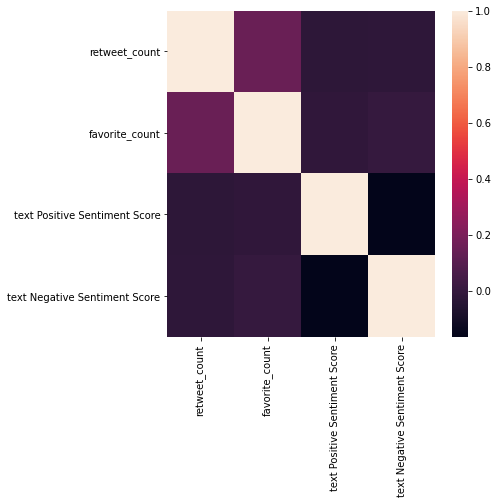

In [56]:
#correlation map
plt.figure(figsize= (6, 6))
sns.heatmap(features.corr())

In [57]:
 #Import english stop words

stopcorpus: typing.List = stopwords.words('english')

In [58]:
# Convert to lowercase, and remove stop words

def remove_links(text):
    # Remove any hyperlinks that may be in the text starting with http
    return re.sub(r"http\S+", "", text)

def style_text(text:str):
    # Convert to lowercase
    return text.lower()

def remove_words(text_data:str,list_of_words_to_remove: typing.List):
    # Remove all words as specified in a custom list of words
    return [item for item in text_data if item not in list_of_words_to_remove]

def collapse_list_to_string(string_list):
    # This is to join back together the text data into a single string
    return ' '.join(string_list)

def remove_apostrophes(text):
    # Remove any apostrophes as these are irrelavent in our word cloud
    text = text.replace("'", "")
    text = text.replace('"', "")
    text = text.replace('`', "")
    return text

def remove_others(text):
    
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Remove @mentions
    text = re.sub(r'#','',text) # Remove hashtag symbols
    text = re.sub(r'RT[\s]+','',text) # Remove retweets
    text = re.sub(r'Ukraine','',text) 
    text = re.sub(r'ukraine','',text) 
    text = re.sub(r'ukrainian','',text)
    text = re.sub(r'amp','',text)
    text = re.sub(r'rt','',text)
    text = re.sub(r'Russia','',text) 
    text = re.sub(r'russia','',text) 
    return text

In [59]:
tweet_sentiment['cleaned_text'] = tweet_sentiment.loc[:,'text'].astype(str).apply(remove_links)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(style_text)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(lambda x: remove_words(x.split(),stopcorpus))

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(collapse_list_to_string)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_apostrophes)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_others)

<ipython-input-59-2ade89cc017e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-59-2ade89cc017e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-59-2ade89cc017e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-59-2ade89c

In [60]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


tweet_sentiment['clean_lemmatized'] = tweet_sentiment['cleaned_text'].astype(str).apply(lemmatize_text)

tweet_sentiment['clean_lemmatized'] = tweet_sentiment['clean_lemmatized'].apply(collapse_list_to_string)

display(tweet_sentiment['clean_lemmatized'].head(5))

<ipython-input-60-3e2f8e3d0251>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-60-3e2f8e3d0251>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    “‘at current stage, there’s obvious internal force ccp challenge xi,’ taiwan’s spy agency repoed…
1                       : last week went transnistria chisinau look might come next moldova. thoughts:
2             “the moment war stops, escalation sanction stop, trend towards lessening dependence rus…
3                             say lot putin loses italy. “rome pledged oppose n energy embargo rest e…
4                                 “of 5mn s fled moscow launched full-scale invasion february 24, 1mn…
Name: clean_lemmatized, dtype: object

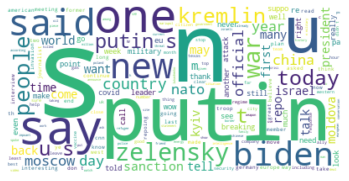

In [61]:
def plot_wordcloud(series,output_filename='wordcloud'):

    wordcloud = WordCloud(max_font_size=150, max_words=500, background_color="white").generate(' '.join(series.astype(str)))

    wordcloud.to_file(output_filename + '.png')

    plt.imshow(wordcloud, interpolation='bilinear')

    plt.axis("off")

plot_wordcloud(tweet_sentiment['clean_lemmatized'],'overall-wordcloud')

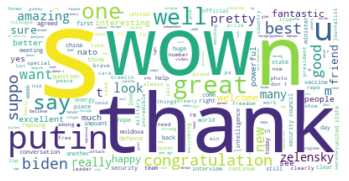

In [62]:
def plot_wordcloud_top_n(df,number_of_tweets,score_column,data_column,output_filename):
    sliced_df = df.nlargest(number_of_tweets,score_column)

    plot_wordcloud(sliced_df[data_column],output_filename)


plot_wordcloud_top_n(tweet_sentiment,500,'text Positive Sentiment Score','clean_lemmatized','positive-wordcloud')

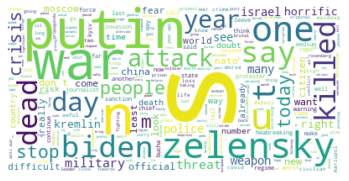

In [63]:
plot_wordcloud_top_n(tweet_sentiment,500,'text Negative Sentiment Score','clean_lemmatized','negative-wordcloud')

In [64]:
#retweets distribution over time
fig = px.line(biannatweets, x="time", y= biannatweets['retweet_count'])
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

In [65]:
df=biannatweets [['time', 'retweet_count','text Positive Sentiment Score','text Negative Sentiment Score']]
pos=biannatweets [['time', 'retweet_count','text Positive Sentiment Score']]
neg =biannatweets [['time', 'retweet_count','text Negative Sentiment Score']]
df[(df['time']>='2022-03-01') & (df['time']<='2022-04-01')]

,time,retweet_count,text Positive Sentiment Score,text Negative Sentiment Score
500,2022-03-31 18:09:30+00:00,38,0.000,0.174
501,2022-03-31 17:55:54+00:00,22,0.000,0.140
502,2022-03-31 17:43:01+00:00,59,0.000,0.063
503,2022-03-31 13:52:32+00:00,32,0.150,0.000
504,2022-03-31 13:36:45+00:00,115,0.000,0.120
...,...,...,...,...
1310,2022-03-01 02:05:13+00:00,6897,0.094,0.176
1311,2022-03-01 02:04:26+00:00,46,0.000,0.185
1312,2022-03-01 01:53:56+00:00,2,0.000,0.000
1313,2022-03-01 01:49:25+00:00,460,0.000,0.000


In [66]:
#how retweets via sentiments are having an evolution over time
fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['time'], y=pos['text Positive Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['time'], y=neg['text Negative Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [67]:

biannatweets["is_viral"] = biannatweets.retweet_count.apply(
    lambda row: 1 if row >= biannatweets.retweet_count.mean()  else 0)

print(biannatweets.is_viral.value_counts())

0    2878
1     372
Name: is_viral, dtype: int64


In [68]:
biannatweets['tweet_length'] = biannatweets.apply(lambda tweet: len(tweet['text']), axis=1)
biannatweets["followers_count"] = biannatweets.apply(lambda tweet: tweet["followers_count"], axis=1)
biannatweets["friends_count"] = biannatweets.apply(lambda tweet: tweet["following"], axis=1)

biannatweets["hashtag_count"] = biannatweets.apply(lambda tweet: tweet.text.count("#"), axis=1)
biannatweets["link_count"] = biannatweets.apply(lambda tweet: tweet.text.count("http"), axis=1)
biannatweets["word_count"] = biannatweets.apply(lambda tweet: len(tweet.text.split()), axis=1)

def find_avg_word_length(str):
    #function to find average word length of a string
    sum = 0
    for i in range(0, len(str.split())):
        sum = sum + len(str.split()[i])
    avg = sum/len(str.split())
    return avg

biannatweets["avg_length_of_words"] = biannatweets.text.apply(find_avg_word_length)

In [69]:


labels = biannatweets[["is_viral"]]
features = biannatweets[["tweet_length", "followers_count", "friends_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features = scale(features, axis=0)

features2 = biannatweets[["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count"]]
scaled_features2 = scale(features2, axis=0)

features3 = biannatweets[["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features3 = scale(features3, axis=0)

print(features.loc[0])
print(scaled_features[0])


tweet_length                        140
followers_count                  246449
friends_count                      4311
text Positive Sentiment Score      0.06
text Negative Sentiment Score     0.102
Name: 0, dtype: object
[ 0.57278354  0.          0.         -0.20765505  0.30596581]


In [70]:


train_data, test_data, train_labels, test_labels = train_test_split(scaled_features3, labels, 
                                                                    test_size = 0.2,
                                                                    random_state=1)

In [71]:


classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
classifier.score(test_data, test_labels)

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9015384615384615

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

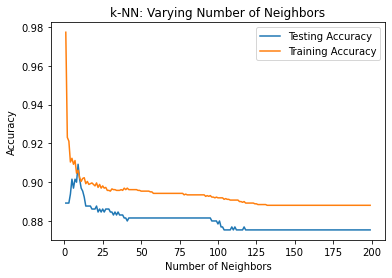

In [72]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 200)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
 # Setup a k-NN Classifier with k neighbors: knn
 knn = KNeighborsClassifier(n_neighbors=k)
 # Fit the classifier to the training data
 knn.fit(train_data, train_labels)
 
 #Compute accuracy on the training set
 train_accuracy[i] = knn.score(train_data, train_labels)
 #Compute accuracy on the testing set
 test_accuracy[i] = knn.score(test_data, test_labels)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [73]:
best_score = 0
best_k = 0

for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    if classifier.score(test_data, test_labels) > best_score:
        best_score = classifier.score(test_data, test_labels)
        best_k = k

print(best_k)
print(best_score)

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

9
0.9092307692307692


C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [76]:
biannatweets.to_csv('biannatweets')